# WeatherPy
---

## Analysis
 
### Latitude vs. Temperature
The data seems to confirm that the temperature is indeed higher as the cities' latitudes approach the equator (or 0 degrees latitude). Interestingly, it also appears that this sample captured a higher number of random cities in the northern than the southern hemisphere. 

### Latitude vs. Humidity
There does not appear to be any relationship between latitude and humidity, but it does seem that most cities in the sample had over 50% humidity on the date of capture. 

### Latitude vs. Cloudiness
There does not appear to be any relationship between latitude and cloudiness, but there is an interesting clustering pattern where there are a large number of cities that appear to have 0%, 80%, and 100% cloudiness.

### Latitude vs. Wind Speed
There does not appear to be any relationship between latitude and wind speed, but it does appear that most of the cities in this sample had winds less than 15mph on the date of capture.

---


## Analysis Process and Graph Creation
### Step 1: Setup for Analysis

In [27]:
# Dependencies
from citipy import citipy # for cities list based on random lat and lon
import openweathermapy.core as owm  # for gathering weather data for cities
import matplotlib.pyplot as plt # for creating plots of data
import pandas as pd
import numpy as np
import requests
import time
import csv
from owm_api_key import owm_api_key

# Define Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

### Step 2: Generate a List of Random Cities

In [40]:
# List to hold coordinates and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)

619

### Step 3: Make API Calls for the Cities' Weather

In [41]:
# reference activities 6:2:5 - 6:2:10
# owm api parameters: https://openweathermap.org/current#cities

# Save config information then build partial query URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial" 
query_url = f"{url}appid={owm_api_key}&units={units}&q="

# set up lists to hold specific city info 
# need to create a new list for only the cities that could be found
found_cities = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# set a counter to keep track of nu. of cities found
# Loop through the list of cities and perform a request for data for each city
# skip cities that cant be found - https://stackoverflow.com/questions/549674/skipping-iterations-in-python#
# inside exception, define conditional for what to do if find or dont find city
counter = 0
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        if response['cod'] == 200:
            counter += 1
            print(f"Processing Record {counter} of Set 1 | {city}")
            found_cities.append(response['name'])
            cloudiness.append(response['clouds']['all'])
            country.append(response['sys']['country'])
            date.append(response['dt'])
            humidity.append(response['main']['humidity'])
            lat.append(response['coord']['lat'])
            lng.append(response['coord']['lon'])
            max_temp.append(response['main']['temp_max'])
            wind_speed.append(response['wind']['speed']) 
        if response['cod'] == "404":
            print('City not found. Skipping...')
#        print(response)
    except:
        continue

Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | taltal
Processing Record 3 of Set 1 | qaanaaq
Processing Record 4 of Set 1 | bud
Processing Record 5 of Set 1 | yenagoa
Processing Record 6 of Set 1 | avarua
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | atuona
Processing Record 9 of Set 1 | balikpapan
Processing Record 10 of Set 1 | east london
Processing Record 11 of Set 1 | new norfolk
Processing Record 12 of Set 1 | hobart
Processing Record 13 of Set 1 | chumikan
Processing Record 14 of Set 1 | ponta do sol
Processing Record 15 of Set 1 | coquimbo
Processing Record 16 of Set 1 | mataura
Processing Record 17 of Set 1 | hithadhoo
City not found. Skipping...
Processing Record 18 of Set 1 | guerrero negro
Processing Record 19 of Set 1 | benguela
Processing Record 20 of Set 1 | pasaje
Processing Record 21 of Set 1 | palma
Processing Record 22 of Set 1 | namatanai
Processing Record 23 of Set 1 | bethel
Processing Record 24 of Set 1 | yellowknife


Processing Record 186 of Set 1 | ewa beach
Processing Record 187 of Set 1 | hofn
Processing Record 188 of Set 1 | kruisfontein
Processing Record 189 of Set 1 | sioux lookout
Processing Record 190 of Set 1 | clyde river
Processing Record 191 of Set 1 | semey
Processing Record 192 of Set 1 | cabo san lucas
Processing Record 193 of Set 1 | trzcianka
Processing Record 194 of Set 1 | ancud
Processing Record 195 of Set 1 | chesma
Processing Record 196 of Set 1 | meulaboh
Processing Record 197 of Set 1 | kalabo
Processing Record 198 of Set 1 | cardenas
Processing Record 199 of Set 1 | belmonte
Processing Record 200 of Set 1 | staryy krym
Processing Record 201 of Set 1 | berlevag
Processing Record 202 of Set 1 | omboue
Processing Record 203 of Set 1 | kodiak
Processing Record 204 of Set 1 | san francisco
Processing Record 205 of Set 1 | champerico
Processing Record 206 of Set 1 | mysliborz
Processing Record 207 of Set 1 | gari
Processing Record 208 of Set 1 | norman wells
Processing Record 209

Processing Record 362 of Set 1 | gilgit
Processing Record 363 of Set 1 | muskegon
Processing Record 364 of Set 1 | palmer
Processing Record 365 of Set 1 | djambala
Processing Record 366 of Set 1 | guarapari
Processing Record 367 of Set 1 | naze
Processing Record 368 of Set 1 | lichuan
City not found. Skipping...
Processing Record 369 of Set 1 | kavaratti
Processing Record 370 of Set 1 | odienne
City not found. Skipping...
Processing Record 371 of Set 1 | moerai
Processing Record 372 of Set 1 | nizwa
Processing Record 373 of Set 1 | eirunepe
Processing Record 374 of Set 1 | trelew
Processing Record 375 of Set 1 | aras
Processing Record 376 of Set 1 | bambous virieux
Processing Record 377 of Set 1 | anta
Processing Record 378 of Set 1 | rocha
Processing Record 379 of Set 1 | kyabe
City not found. Skipping...
City not found. Skipping...
Processing Record 380 of Set 1 | vestmannaeyjar
Processing Record 381 of Set 1 | puteyets
Processing Record 382 of Set 1 | bathsheba
Processing Record 383

Processing Record 547 of Set 1 | wajima
Processing Record 548 of Set 1 | shemgang
Processing Record 549 of Set 1 | bilma
Processing Record 550 of Set 1 | egvekinot
Processing Record 551 of Set 1 | hobyo
Processing Record 552 of Set 1 | husavik
Processing Record 553 of Set 1 | itarema
Processing Record 554 of Set 1 | poso
Processing Record 555 of Set 1 | cukai


In [50]:
# print list of found cities to ensure there are more than 500
len(found_cities)

555

### Step 4: Convert the Raw Data into a DataFrame

In [48]:
# format date data
date = time.strftime("%Y-%m-%d") 

# create data frame with a list of dictionaries 
all_weather_df = pd.DataFrame({"City": found_cities, "Cloudiness": cloudiness, "Country": country, "Date": date, "Humidity": humidity, "Lat": lat, "Lng": lng, "Max Temp": max_temp, "Wind Speed": wind_speed})

# export pandas df as csv = https://stackoverflow.com/questions/46143726/pandas-data-frame-saving-into-csv-file 
all_weather_df.to_csv('weather_output.csv', index=False)

# display the data frame
all_weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Rikitea,92,PF,2018-10-11,100,-23.12,-134.97,70.14,10.76
1,Taltal,0,CL,2018-10-11,74,-25.41,-70.49,65.19,3.71
2,Qaanaaq,56,GL,2018-10-11,100,77.48,-69.36,19.65,9.08
3,Bud,0,NO,2018-10-11,71,62.91,6.91,62.60,8.05
4,Yenagoa,88,NG,2018-10-11,90,4.92,6.26,75.72,7.63


### Step 5: Plot the Data

#### Latitude vs. Temperature Plot

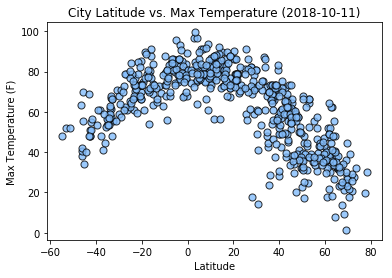

In [43]:
# define latitude and max temp as the x and y axis values by extracting them from the df
x = all_weather_df["Lat"]
y = all_weather_df["Max Temp"]
 
# create scatter plot; customize size, color, transparency, edge color and width.
plt.scatter(x, y, s=50, c="#83bdfc", alpha=0.8, edgecolors="black", linewidth=1)
 
# Add title, x axis label, and y axis label
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs. Max Temperature ({date})")
    
# display scatter plot
#plt.show()

# save the image as png
plt.savefig('LatTemp.png', bbox_inches='tight')

#### Latitude vs. Humidity Plot

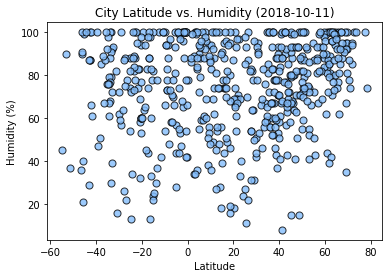

In [44]:
# define Latitude and humidity as x and y axis values by extracting them from the df
x = all_weather_df["Lat"]
y = all_weather_df["Humidity"]
 
# create scatter plot; customize size, color, transparency, edge color and width.
plt.scatter(x, y, s=50, c="#83bdfc", alpha=0.8, edgecolors="black", linewidth=1)
 
# Add title, x axis label, and y axis label
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity ({date})")

# display scatter plot
#plt.show()

# save the image as a png
plt.savefig('LatHumidity.png', bbox_inches='tight')

#### Latitude vs. Cloudiness Plot

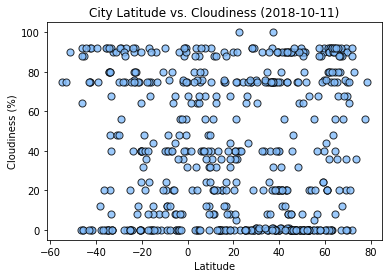

In [45]:
# define latitude and cloudiness as x and y axis values by extracting them from the df
x = all_weather_df["Lat"]
y = all_weather_df["Cloudiness"]
 
# create scatter plot; customize size, color, transparency, edge color and width.
plt.scatter(x, y, s=50, c="#83bdfc", alpha=0.8, edgecolors="black", linewidth=1)
 
# Add title, x axis label, and y axis label
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness ({date})")
 
# display scatter plot
#plt.show()

# save the image as a png
plt.savefig('LatCloudiness.png', bbox_inches='tight')

#### Latitude vs. Wind Speed Plot

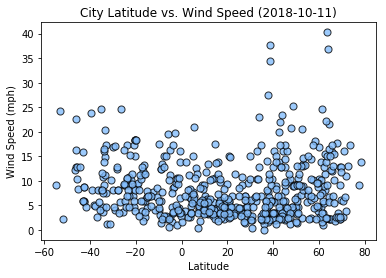

In [46]:
# define latitude and wind speed as x and y axis values by extracting them from the df
x = all_weather_df["Lat"]
y = all_weather_df["Wind Speed"]
 
# create scatter plot; customize size, color, transparency, edge color and width.
plt.scatter(x, y, s=50, c="#83bdfc", alpha=0.8, edgecolors="black", linewidth=1)
 
# Add title, x axis label, and y axis label
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs. Wind Speed ({date})")
 
# display scatter plot
#plt.show()

# save the image as a png
plt.savefig('LatWindSpeed.png', bbox_inches='tight')